# More fun with gravity waves

[Motion Clouds](http://motionclouds.invibe.net) were defined in the origin to provide a simple parameterization for 
textures. Thus we used a simple unimodal, normal distribution (on the log-radial frequency space to be more precise). But the larger set of Random Phase Textures may provide some interesting examples, some of them can even be fun! This is the case of this simulation of the waves you may observe on the surface on the ocean. 

Main features of gravitational waves are:

1. longer waves travel faster (tsunami are fast and global, ripples are slow and local) - speed is *linearly proportional* to wavelength
2. phase speed (following a wave's crest) is **twice** as fast as group speed (following a group of waves).

More info about deep water waves : http://farside.ph.utexas.edu/teaching/336L/Fluidhtml/node122.html

<!-- TEASER_END -->

In [1]:
import os
import numpy as np
import MotionClouds as mc
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
mc.figpath = '../files/2016-04-24_a-wave-going-backwards'
if not(os.path.isdir(mc.figpath)): os.mkdir(mc.figpath)

def envelope_gravity(fx, fy, ft, B_wave, V_X, V_Y, g=.1):
    """
     Gravitational envelope:
     selects the manifold corresponding to the speed (V_X, V_Y) with some thickness B_V

    """
    k = fx*V_X+fy*V_Y
    env = np.exp(-.5*(((ft/.5)**2-g*np.sqrt(((k/.5)**2)))**2/(B_wave*mc.frequency_radius(fx, fy, ft, clean_division=True))**2))
    env *= (ft*k) < 0
    return env

def envelope_gabor_wave(fx, fy, ft, B_wave, V_X, V_Y,
                        B_V=mc.B_V, B_v=1., sf_0=mc.sf_0, B_sf=mc.B_sf, loggabor=mc.loggabor,
                        theta=mc.theta, B_theta=mc.B_theta, alpha=mc.alpha):
    """
    Returns the Motion Cloud kernel

    """
    envelope = mc.envelope_gabor(fx, fy, ft, V_X, V_Y,
                                 B_V=B_V, sf_0=sf_0, B_sf=B_sf, loggabor=loggabor,
                                 theta=theta, B_theta=B_theta, alpha=alpha)
    envelope *= envelope_gravity(fx, fy, ft, B_wave=B_wave, V_X=V_X, V_Y=V_Y)
    return envelope

In [2]:
name = 'wave2'
theta, B_theta, B_wave = 0., np.pi/12., .02
alpha, sf_0, B_sf, B_V = 1., .2, .4, 2.
recompute = True
env = envelope_gabor_wave(fx, fy, ft, V_X=1.5, V_Y=0., B_wave=B_wave, B_V=B_V, 
                          theta=theta, B_theta=B_theta, sf_0=sf_0, B_sf=B_sf, alpha=alpha)
mc.figures(env, name, recompute=recompute, figpath=mc.figpath)
mc.in_show_video(name, figpath=mc.figpath)

/usr/local/lib/python3.6/site-packages/vispy/visuals/isocurve.py:22: UserWarning: VisPy is not yet compatible with matplotlib 2.2+
  warnings.warn("VisPy is not yet compatible with matplotlib 2.2+")


In [3]:
name = 'wave2_back'
im = mc.rectif(mc.random_cloud(env))

In [4]:
im_back = im.copy()
for i in range(mc.N_frame):
    im_back[:, :, i] = np.roll(im[:, :, i], -i, axis=0)
mc.anim_save(im_back, os.path.join(mc.figpath, name))
mc.in_show_video(name, figpath=mc.figpath)

## Post-prod

In [5]:
!curl https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Paperboat.svg/1000px-Paperboat.svg.png -o /tmp/Paperboat.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 38858  100 38858    0     0   221k      0 --:--:-- --:--:-- --:--:--  220k


In [6]:
# Import everything needed to edit video clips
import moviepy.editor as mvp
w,h = moviesize = (mc.N_X, mc.N_Y)
fps = 25
zoom = 1.5
duration = mc.N_frame/fps
clip = mvp.VideoFileClip(os.path.join(mc.figpath, name+mc.vext))
clip.ipython_display(fps=fps, duration=duration, autoplay=1, loop=1)

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


100%|█████████▉| 256/257 [00:00<00:00, 943.70it/s]



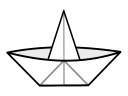

In [7]:
overlay = mvp.ImageClip('/tmp/Paperboat.png').resize((zoom*mc.N_X/3, zoom*mc.N_Y/4))
overlay.duration = clip.duration
overlay.ipython_display(duration=duration, autoplay=1, loop=1)

In [8]:
#overlay.rotate(lambda t:10*np.sin(2*np.pi*t/duration))
#overlay.fl_time(mvp.vfx.rotate, lambda t:10*np.sin(2*np.pi*t/duration))
overlay = overlay.fx(mvp.vfx.rotate, lambda t:10*np.sin(2*np.pi*t/duration))
overlay = overlay.set_position((mc.N_X/2-zoom*mc.N_X/6, mc.N_Y/2-zoom*mc.N_Y/8))
final_clip = mvp.CompositeVideoClip([clip, overlay])
final_clip.duration = duration
final_clip.ipython_display(fps=fps, duration=duration, autoplay=1, loop=1)

100%|█████████▉| 256/257 [00:01<00:00, 248.42it/s]


In [9]:
final_clip.write_videofile("/tmp/moving_backwards.mp4", fps=fps)

[MoviePy] >>>> Building video /tmp/moving_backwards.mp4
[MoviePy] Writing video /tmp/moving_backwards.mp4


100%|█████████▉| 256/257 [00:01<00:00, 248.99it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /tmp/moving_backwards.mp4 



## some book keeping for the notebook

In [1]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, MotionClouds

Software versions
Python 3.7.1 64bit [Clang 10.0.0 (clang-1000.11.45.5)]
IPython 7.1.1
OS Darwin 17.7.0 x86_64 i386 64bit
numpy 1.15.4
scipy 1.1.0
matplotlib 3.0.1
MotionClouds 20180606
Wed Nov 14 09:37:58 2018 CET